In [1]:
import joblib
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from ngboost import NGBClassifier
from ngboost.distns import Bernoulli

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import matplotlib.font_manager as fm
from sklearn.impute import SimpleImputer

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_excel(r"C:\Users\ROG\OneDrive\Desktop\445例机器学数据0820.xlsx")
data

,RF,Age,Sex,Hypertension,Diabetes mellitus,Dyslipidemia,Prior stroke,Intravenous thrombolysis,Baseline SBP,Baseline DBP,...,Tbil,BUN,Serum creatinine,Serum uric acid,Serum glucose,HCY,Glycosylated hemoglobin,AGR,NLR,Direct bilirubin
0,1,54,1,0,0,0,0,0,151,54,...,8.20,3.7,46,220.0,7.40,7.1,5.4,1.942529,4.600000,3.40
1,1,80,1,1,0,0,1,0,189,160,...,17.90,3.6,47,255.0,8.40,11.2,6.2,1.688716,9.300000,7.50
2,1,70,1,1,0,0,1,1,217,156,...,26.98,8.3,116,283.0,8.90,14.0,6.2,1.119850,13.833333,6.57
3,1,72,1,1,0,0,0,0,154,126,...,18.02,5.9,62,348.0,10.10,14.8,5.5,1.334495,17.600000,0.20
4,0,50,1,1,0,0,0,1,140,84,...,14.90,2.8,46,218.0,6.50,9.3,5.6,1.656904,4.818182,5.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,1,67,0,1,0,1,1,0,149,99,...,19.10,2.9,71,426.0,6.74,42.1,5.6,1.886139,5.781250,7.00
441,0,56,0,0,0,0,0,0,116,70,...,5.00,9.0,52,355.0,4.63,11.0,5.3,1.722222,3.384615,2.70
442,0,73,0,0,0,0,0,0,145,92,...,27.10,2.3,39,299.0,5.30,14.0,6.2,1.550420,9.111111,7.90
443,1,72,1,1,0,0,0,0,166,86,...,9.00,4.3,44,246.0,7.60,7.5,6.9,2.257282,16.750000,5.00


In [7]:
names=print(data.columns)
names

Index(['RF', 'Age', 'Sex', 'Hypertension', 'Diabetes mellitus', 'Dyslipidemia',
       'Prior stroke', 'Intravenous thrombolysis', 'Baseline SBP',
       'Baseline DBP', 'Initial NIHSS', 'Occlusion site',
       'Etiology based on TOAST', 'Endovascular thrombectomy',
       'Times undergone thrombectomy', 'Hemorrhagic transformation', 'ASPECTS',
       'Pulmonary infection', 'MLS', 'DPT', 'ORT', 'RBC', 'Lymphocyte',
       'Neutrophils', 'Platelet', 'CRP', 'Tbil', 'BUN', 'Serum creatinine',
       'Serum uric acid', 'Serum glucose', 'HCY', 'Glycosylated hemoglobin',
       'AGR', 'NLR', 'Direct bilirubin'],
      dtype='object')


In [8]:
data.shape

(445, 36)

In [9]:
numeric_features = ['Age','Baseline SBP', 'Baseline DBP', 'Initial NIHSS',
       'Times undergone thrombectomy','ASPECTS','MLS', 'DPT', 'ORT', 'RBC', 'Lymphocyte',
       'Neutrophils', 'Platelet', 'CRP', 'Tbil', 'Direct bilirubin',
       'BUN', 'Serum creatinine', 'Serum uric acid',
       'Serum glucose', 'HCY', 'Glycosylated hemoglobin','AGR',
       'NLR']
categorical_features = ['Occlusion site','Etiology based on TOAST', 'Endovascular thrombectomy']
binary_features = ['Sex', 'Hypertension', 'Diabetes mellitus', 'Dyslipidemia',
                   'Prior stroke', 'Intravenous thrombolysis','Pulmonary infection','Hemorrhagic transformation']

In [10]:
data_encoded = pd.get_dummies(data, columns=['Occlusion site','Etiology based on TOAST', 'Endovascular thrombectomy'], drop_first=True)
data_encoded

,RF,Age,Sex,Hypertension,Diabetes mellitus,Dyslipidemia,Prior stroke,Intravenous thrombolysis,Baseline SBP,Baseline DBP,...,Direct bilirubin,Occlusion site_2,Occlusion site_3,Etiology based on TOAST_2,Etiology based on TOAST_3,Endovascular thrombectomy_2,Endovascular thrombectomy_3,Endovascular thrombectomy_4,Endovascular thrombectomy_5,Endovascular thrombectomy_6
0,1,54,1,0,0,0,0,0,151,54,...,3.40,True,False,False,False,True,False,False,False,False
1,1,80,1,1,0,0,1,0,189,160,...,7.50,False,False,True,False,False,False,False,False,False
2,1,70,1,1,0,0,1,1,217,156,...,6.57,True,False,True,False,False,False,False,False,False
3,1,72,1,1,0,0,0,0,154,126,...,0.20,False,False,False,False,False,False,False,True,False
4,0,50,1,1,0,0,0,1,140,84,...,5.20,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,1,67,0,1,0,1,1,0,149,99,...,7.00,True,False,False,False,False,False,False,False,False
441,0,56,0,0,0,0,0,0,116,70,...,2.70,False,False,False,False,False,False,False,False,False
442,0,73,0,0,0,0,0,0,145,92,...,7.90,False,False,True,False,False,False,False,False,False
443,1,72,1,1,0,0,0,0,166,86,...,5.00,True,False,True,False,False,False,False,False,False


In [11]:
numeric_features = ['Age','Baseline SBP', 'Baseline DBP', 'Initial NIHSS',
       'Times undergone thrombectomy','ASPECTS','MLS', 'DPT', 'ORT', 'RBC', 'Lymphocyte',
       'Neutrophils', 'Platelet', 'CRP', 'Tbil', 'Direct bilirubin',
                    'BUN', 'Serum creatinine', 'Serum uric acid',
       'Serum glucose', 'HCY', 'Glycosylated hemoglobin', 'AGR',
       'NLR']

# 对计量变量进行标准化处理
scaler = StandardScaler()
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])

# 将特征变量和目标变量分开
X = data_encoded.drop(columns=['RF'])  # 'label' 是目标变量的列名
y = data_encoded['RF']

In [12]:
X.shape

(445, 41)

In [13]:
y.shape

(445,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.metrics import accuracy_score, roc_auc_score

In [15]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, roc_auc_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# 假设 X 和 y 是你的特征和标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化 CatBoost 模型
model = CatBoostClassifier(
    iterations=148,
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=3,
    border_count=34,
    loss_function='Logloss',
    eval_metric='AUC',
    random_state=42,
    verbose=0
)

# 训练模型
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, use_best_model=True)

# 预测
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8284
AUC: 0.8905
Precision: 0.8276
Recall: 0.9000
F1 Score: 0.8623


In [16]:
# 训练CatBoost模型
model = CatBoostClassifier(iterations=200, learning_rate=0.05, depth=4, verbose=0, random_state=42)
model.fit(X_train, y_train)

# 预测和评估
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')




Accuracy: 0.7985
AUC: 0.8914
Precision: 0.8046
Recall: 0.8750
F1 Score: 0.8383


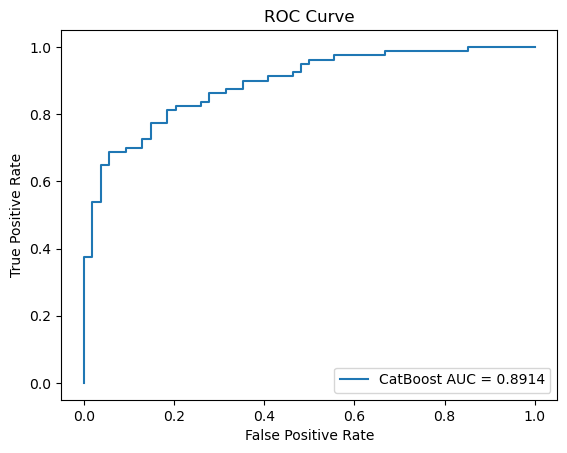

In [17]:
# AUC曲线图形化
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'CatBoost AUC = {auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

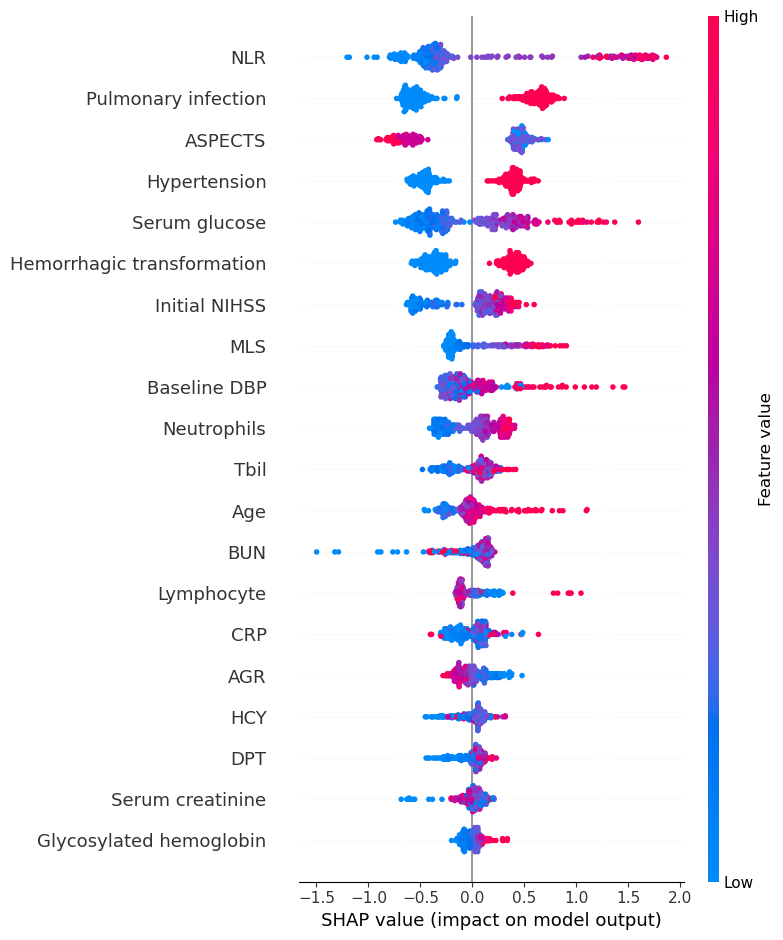

In [19]:
# 使用SHAP进行解释
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# SHAP值可视化
shap.summary_plot(shap_values, X_train)

# 根据SHAP选择前12个特征



In [20]:
import numpy as np

# 假设 shap_values 是二维数组，每个样本对应一组 SHAP 值
shap_importance = np.abs(shap_values).mean(axis=0)

# 获取前10个特征的索引
top_12_features = np.argsort(shap_importance)[-12:]

# 使用 iloc 选择前10个特征
X_train_top12 = X_train.iloc[:, top_12_features]
X_test_top12 = X_test.iloc[:, top_12_features]
X_test_top12

,Age,Tbil,Neutrophils,Baseline DBP,MLS,Initial NIHSS,Hemorrhagic transformation,Serum glucose,Hypertension,ASPECTS,Pulmonary infection,NLR
284,-1.752736,0.707914,0.034609,-0.466137,-0.643295,-2.387611,0,-0.881217,0,-1.303443,0,-0.566226
358,0.781804,-0.033569,-0.468493,-0.866325,-0.643295,-0.681901,0,0.044535,1,0.520557,0,-0.212438
117,0.036351,0.525396,2.392901,0.734427,3.001216,0.512096,1,0.543017,1,-1.303443,0,2.582984
412,1.229076,2.416748,0.191829,-1.466607,-0.643295,0.000383,0,-0.916823,1,0.520557,1,-0.167592
70,0.036351,0.753544,0.883594,1.201313,-0.643295,0.341525,0,0.293776,1,-0.391443,1,0.988447
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.707259,2.704215,1.009370,0.334239,-0.643295,1.876665,0,0.080141,1,1.432558,1,-0.319073
131,-0.560011,-0.843496,0.789263,0.601031,-0.643295,-0.170188,0,-0.489553,0,2.344558,1,-0.592138
26,1.005440,-0.210384,0.977926,1.868293,3.027538,0.170954,1,2.679370,0,-0.391443,0,3.340389
7,-0.560011,0.000654,1.386697,2.601971,-0.643295,0.512096,0,-0.703188,1,2.344558,1,-0.150508


New Model Accuracy: 0.8209
New Model AUC: 0.8975
New Model Precision: 0.8333
New Model Recall: 0.8750
New Model F1 Score: 0.8537


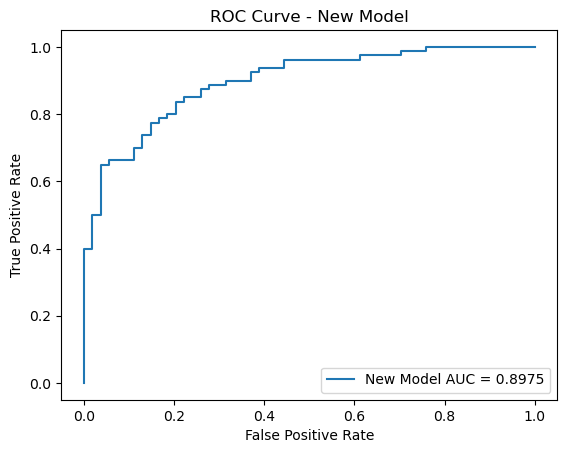

In [22]:
# 训练新模型
F_model = CatBoostClassifier(iterations=200, learning_rate=0.05, depth=4, verbose=0, random_state=42)
F_model.fit(X_train_top12, y_train)

# 预测和评估
y_pred_new = F_model.predict(X_test_top12)
y_pred_proba_new = F_model.predict_proba(X_test_top12)[:, 1]

# 计算评估指标
accuracy_new = accuracy_score(y_test, y_pred_new)
auc_new = roc_auc_score(y_test, y_pred_proba_new)
precision_new = precision_score(y_test, y_pred_new)
recall_new = recall_score(y_test, y_pred_new)
f1_new = f1_score(y_test, y_pred_new)

print(f'New Model Accuracy: {accuracy_new:.4f}')
print(f'New Model AUC: {auc_new:.4f}')
print(f'New Model Precision: {precision_new:.4f}')
print(f'New Model Recall: {recall_new:.4f}')
print(f'New Model F1 Score: {f1_new:.4f}')

# 新模型AUC曲线图形化
fpr_new, tpr_new, _ = roc_curve(y_test, y_pred_proba_new)
plt.figure()
plt.plot(fpr_new, tpr_new, label=f'New Model AUC = {auc_new:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - New Model')
plt.legend(loc='lower right')
plt.show()


In [23]:
feature_names = X_train_top12.columns

# 将其转换为列表
feature_names_list = feature_names.tolist()

print("Feature Names:", feature_names_list)

Feature Names: ['Age', 'Tbil', 'Neutrophils', 'Baseline DBP', 'MLS', 'Initial NIHSS', 'Hemorrhagic transformation', 'Serum glucose', 'Hypertension', 'ASPECTS', 'Pulmonary infection', 'NLR']


In [32]:
# 保存模型
import joblib
# Streamlit 应用部署
import streamlit as st

joblib.dump(F_model, 'CatBoost.pkl')
import matplotlib.pyplot as plt


In [33]:
import matplotlib.pyplot as plt
import streamlit as st

In [34]:
import joblib
import streamlit as st
joblib.dump(F_model, 'CatBoost.pkl')
import matplotlib.pyplot as plt

model = joblib.load('CatBoost.pkl')
st.title("RF Prediction")

feature_names = ['Age', 'Tbil', 'Neutrophils', 'Baseline DBP', 'MLS', 'Initial NIHSS', 
                 'Hemorrhagic transformation', 'Serum glucose', 'Hypertension', 'ASPECTS', 'Pulmonary infection', 'NLR']

NLR=st.number_input("NLR:", min_value=1.00, max_value=100.00, value=10.00)
PI=st.selectbox("Pulmonary infection (0=NO, 1=Yes):", options=[0, 1], format_func=lambda x: 'NO (0)' if x == 0 else 'Yes (1)')
ASPECTS=st.number_input("ASPECTS:", min_value=5, max_value=10, value=8)
HTN=st.selectbox("Hypertension (0=NO, 1=Yes):", options=[0, 1], format_func=lambda x: 'NO (0)' if x == 0 else 'Yes (1)')
GLU=st.number_input("Serum glucose:", min_value=2.2, max_value=32.0, value=8.0)
HT=st.selectbox("Hemorrhagic transformation (0=NO, 1=Yes):", options=[0, 1], format_func=lambda x: 'NO (0)' if x == 0 else 'Yes (1)')
NIHSS=st.number_input("Initial NIHSS:", min_value=3, max_value=42, value=16)
MLS=st.number_input("MLS:", min_value=0.00, max_value=30.00, value=2.88)
DBP=st.number_input("Baseline DBP:", min_value=40, max_value=160, value=85)
NE=st.number_input("Neutrophils:", min_value=1.50, max_value=30.00, value=8.00)
TB=st.number_input("Tbil:", min_value=3.00, max_value=100.00, value=17.00)
Age=st.number_input("Age:", min_value=18, max_value=100, value=66)
# 生成用户输入窗口


In [35]:
feature_values = [NLR,PI,ASPECTS,HTN,GLU,HT,NIHSS,MLS,DBP,NE,TB,Age]
features = np.array([feature_values])

In [36]:
if st.button("Predict"):
    predicted_class = model.predict(features)[0]
    predicted_proba = model.predict_proba(features)[0]
    st.write(f"**Predicted Class:** {predicted_class}")
    st.write(f"**Prediction Probabilities:** {predicted_proba}")
    probability = predicted_proba[predicted_class] * 100

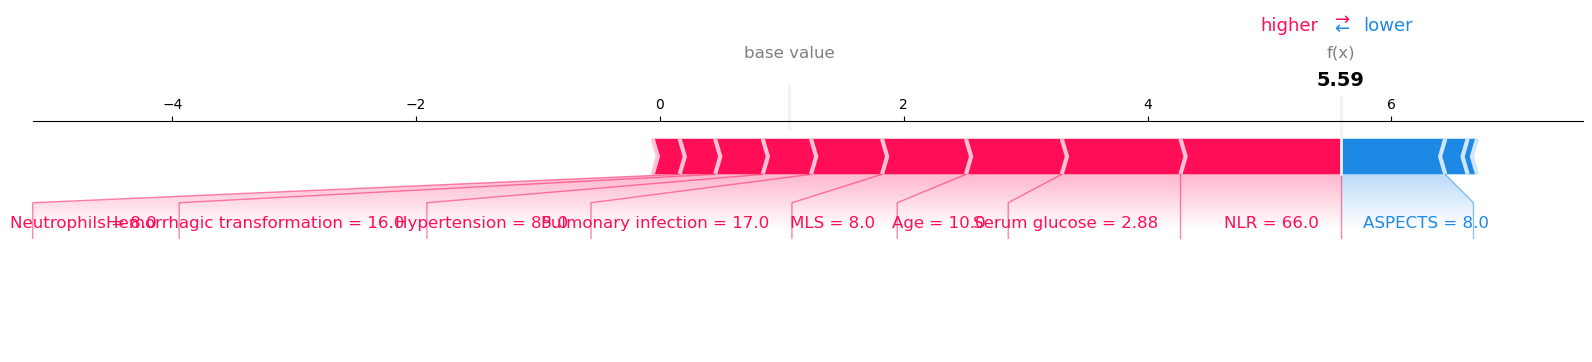

DeltaGenerator()

<Figure size 640x480 with 0 Axes>

In [37]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(pd.DataFrame([feature_values],columns=feature_names))

shap.force_plot(explainer.expected_value, shap_values[0], pd.DataFrame([feature_values], columns=feature_names), matplotlib=True)
plt.savefig("shap_force_plot.png", bbox_inches='tight', dpi=1200)
st.image("shap_force_plot.png")